# X-ray Chest Classification

## Deep Learning Model for Chest X-ray Classification

This notebook implements a convolutional neural network (CNN) to classify chest X-ray images into three categories:
- Normal
- COVID-19
- Pneumonia

**Dataset Source**: [COVID Pneumonia Normal Chest X-ray Images](https://www.kaggle.com/datasets/sachinkumar413/covid-pneumonia-normal-chest-xray-images)


In [26]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
CLASSES = ['COVID', 'NORMAL', 'PNEUMONIA']

# 1. Dataset loading

In [20]:
class ChestXrayDataset(Dataset):
    def __init__(self, data_dir, transform):
        self.data_dir = data_dir
        self.transform = transform
        self.images = []
        self.labels = []
        for class_name in CLASSES:
            class_path = os.path.join(data_dir, class_name)
            for image in os.listdir(class_path):
                self.images.append(os.path.join(class_path, image))
                self.labels.append(class_name)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = self.images[idx]
        img = Image.open(image_path).convert("RGB")
        label = self.labels[idx]

        y = CLASSES.index(label)

        transformed_image = self.transform(img)

        original_image = torch.tensor(cv2.resize(np.asarray(img), (224, 224)))
 

        return original_image, transformed_image, torch.tensor(y)

In [21]:
train_dir = "data/train"
val_dir = "data/val"
test_dir = "data/test"

BATCH_SIZE = 32

train_transform = transforms.Compose(
    [
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

eval_transform = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

train_dataset = ChestXrayDataset(train_dir, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True)

val_dataset = ChestXrayDataset(val_dir, transform=eval_transform)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True  )

test_dataset = ChestXrayDataset(test_dir,transform=eval_transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

print("Train loader size: ", len(train_loader))
print("Train loader size: ", len(val_loader))
print("Train loader size: ", len(test_loader))

Train loader size:  131
Train loader size:  17
Train loader size:  17


In [22]:
original_img, inputs, labels = next(iter(train_loader))

/Users/mac/Desktop/Code/Personal_Project/VNUK/xray_chest_classification/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


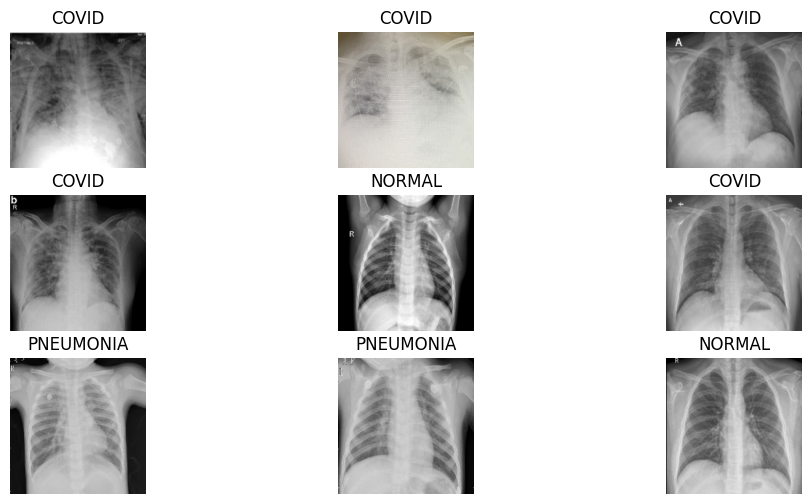

In [30]:
plt.figure(figsize=(12, 6))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(
        original_img[i].cpu().detach().numpy().reshape(224, 224, 3).astype("uint8")
    )
    plt.title(f"{CLASSES[labels[i]]}")
    plt.axis("off")

# 2. Baseline Model

# 3. Reference Model: EfficientNet (Transfer Learning)



# 4. Advanced model(Modified EfficientNet for model Improvement)

#  5. Model Evaluation